# Movie Rating Analysis
** Is a movie worth watching? How well does a film compare with others within a similar class of movies? Are certain movies critiqued more harshly than others?**
This is an exploration of movie ratings from multiple available datasets consisting of movies ranging from 1975 to 2019. 
Movie ratings play a major role in influencing people to go and watch movies. An immediate high or low score on an aggregated-scorekeeper website like Rotten Tomatoes or Metacritic can determine a movie's success or failure in the box office. Several factors such as good directors, experienced actors, and release time are important for profitability and success, but they do not guarantee profits the same way ratings do. Producers are coming to realize that it's not only how well a movie is produced, but the early positive reviews and ratings that lead to a commercially successful movie. In this project, i seek to understand temporal patterns affecting movie's ratings, whether genre, duration length of movie or content rating influence how critical people rate movies of that category. I will use IMDB, Rottentomatoes and other rating systems for this project, and i'll use the Pandas package for Python to explore, analyze and visualize each dataset.The datasets are provided by Blockbuster and Kaggle.com.

In [1]:
import pandas as pd

In [3]:
movies1 = pd.read_csv('data/blockbuster.csv')
movies1.head()

,audience_freshness,poster_url,rt_audience_score,rt_freshness,rt_score,2015_inflation,adjusted,genres,Genre_1,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,release_date,studio,title,worldwide_gross,year
0,92,http://resizing.flixster.com/gxRJwetP1eNIrPR6x...,4.3,89,7.5,-0.26%,"$712,903,691.09",Sci-Fi\nAdventure\nAction,Sci-Fi,Adventure,Action,7.8,136,7,PG-13,4-Apr-14,Marvel Studios,Captain America: The Winter Soldier,"$714,766,572.00",2014
1,89,http://resizing.flixster.com/gDtbA1iPxTYEjBZeS...,4.2,90,7.9,-0.26%,"$706,988,165.89",Sci-Fi\nDrama\nAction,Sci-Fi,Drama,Action,7.7,130,9,PG-13,11-Jul-14,20th Century Fox,Dawn of the Planet of the Apes,"$708,835,589.00",2014
2,93,http://resizing.flixster.com/YrF_OeTQx3bXNsMLI...,4.4,91,7.7,-0.26%,"$772,158,880.00",Sci-Fi\nAdventure\nAction,Sci-Fi,Adventure,Action,8.1,121,3,PG-13,1-Aug-14,Marvel Studios,Guardians of the Galaxy,"$774,176,600.00",2014
3,86,http://resizing.flixster.com/l9yjA-72sZMYECeOj...,4.2,72,7.0,-0.26%,"$671,220,455.10",Sci-Fi\nAdventure,Sci-Fi,Adventure,NaN,8.7,169,10,PG-13,7-Nov-14,Paramount Pictures / Warner Bros.,Interstellar,"$672,974,414.00",2014
4,71,http://resizing.flixster.com/YukULOFULUesVZccN...,3.8,49,5.7,-0.26%,"$756,677,675.77",Family\nAdventure\nAction,Family,Adventure,Action,7.1,97,4,PG,30-May-14,Walt Disney Pictures,Maleficent,"$758,654,942.00",2014


The Blockbuster dataset provides many features but i won't need most of them.

In [4]:
movies1.columns

Index(['audience_freshness', 'poster_url', 'rt_audience_score', 'rt_freshness',
       'rt_score', '2015_inflation', 'adjusted', 'genres', 'Genre_1',
       'Genre_2', 'Genre_3', 'imdb_rating', 'length', 'rank_in_year', 'rating',
       'release_date', 'studio', 'title', 'worldwide_gross', 'year'],
      dtype='object')

In [5]:
movies1.drop(['poster_url','2015_inflation','adjusted','rank_in_year','genres','release_date','studio','worldwide_gross','year'],axis=1,inplace=True)
movies1.head()

,audience_freshness,rt_audience_score,rt_freshness,rt_score,Genre_1,Genre_2,Genre_3,imdb_rating,length,rating,title
0,92,4.3,89,7.5,Sci-Fi,Adventure,Action,7.8,136,PG-13,Captain America: The Winter Soldier
1,89,4.2,90,7.9,Sci-Fi,Drama,Action,7.7,130,PG-13,Dawn of the Planet of the Apes
2,93,4.4,91,7.7,Sci-Fi,Adventure,Action,8.1,121,PG-13,Guardians of the Galaxy
3,86,4.2,72,7.0,Sci-Fi,Adventure,NaN,8.7,169,PG-13,Interstellar
4,71,3.8,49,5.7,Family,Adventure,Action,7.1,97,PG,Maleficent


Rotten Tomatoes is an review-aggregation website for film and television, containing reviews from notable critics as well as reviews from the general public. The Tomatometer score is calculated from reviews published by Tomatometer-approved critics. The Audience Score is calculated from ratings submitted to Rotten Tomatoes by users. IMDB uses the individual ratings cast by IMDb registered users calculates a single weighted-average rating from all votes.  I will be using all of Rotten Tomatoes' metrics as well as IMDB rating. 

In [6]:
movies1 = movies1[['title','audience_freshness', 'rt_audience_score', 'rt_freshness', 'rt_score',
       'Genre_1', 'Genre_2', 'Genre_3', 'imdb_rating', 'length', 'rating',
       ]]
movies1.head()

,title,audience_freshness,rt_audience_score,rt_freshness,rt_score,Genre_1,Genre_2,Genre_3,imdb_rating,length,rating
0,Captain America: The Winter Soldier,92,4.3,89,7.5,Sci-Fi,Adventure,Action,7.8,136,PG-13
1,Dawn of the Planet of the Apes,89,4.2,90,7.9,Sci-Fi,Drama,Action,7.7,130,PG-13
2,Guardians of the Galaxy,93,4.4,91,7.7,Sci-Fi,Adventure,Action,8.1,121,PG-13
3,Interstellar,86,4.2,72,7.0,Sci-Fi,Adventure,NaN,8.7,169,PG-13
4,Maleficent,71,3.8,49,5.7,Family,Adventure,Action,7.1,97,PG


I check for duplicates and drop them.  

In [7]:
movies1.duplicated().sum()

1

In [8]:
movies1.loc[movies1.duplicated(keep='first'),:]

,title,audience_freshness,rt_audience_score,rt_freshness,rt_score,Genre_1,Genre_2,Genre_3,imdb_rating,length,rating
397,Signs,67,3.2,74,6.8,Thriller,Sci-Fi,Drama,6.7,106,PG-13


In [9]:
movies1.drop_duplicates(keep='first',inplace=True)

I checked rating features and found a few rows that have missing values for some ratings so i will remove them as well.

In [10]:
movies1[(movies1['rt_freshness']==0) | (movies1['rt_score']==0)]

,title,audience_freshness,rt_audience_score,rt_freshness,rt_score,Genre_1,Genre_2,Genre_3,imdb_rating,length,rating
38,The Twilight Saga: Breaking Dawn - Part 1,94,4.5,0,0.0,Fantasy,Drama,Adventure,4.9,117,PG-13
315,Staying Alive,38,2.7,0,2.7,Romance,Music,Drama,4.4,93,PG
382,In Search of Noah's Ark,100,1.7,0,0.0,Family,Documentary,NaN,4.6,99,G
389,To Fly!,75,4.0,0,0.0,History,Documentary,NaN,7.0,27,G
390,"Aloha, Bobby and Rose",60,3.6,0,0.0,Drama,NaN,NaN,6.0,88,PG
395,The Other Side of the Mountain,77,3.6,0,0.0,Drama,Western,War,6.4,103,PG


In [11]:
movies1= movies1[(movies1['rt_freshness']!=0) & (movies1['rt_score']!=0)]

Instead of comparing one rating after another, i calculate a new featue 'totalScore' that is based of all other ratings respectively.  

In [12]:
movies1['totalScore'] = (movies1['audience_freshness'] + (movies1['rt_audience_score']*20) + movies1['rt_freshness'] + (movies1['rt_score']*10) + (movies1['imdb_rating']*10))/50
movies1[['title','totalScore']].sort_values('totalScore',ascending=False).head(10)

,title,totalScore
215,Schindler's List,9.16
68,The Dark Knight,9.04
346,Star Wars Episode V: The Empire Strikes Back,9.00
352,Apocalypse Now,8.98
334,Raiders of the Lost Ark,8.96
49,Toy Story 3,8.94
129,The Lord of the Rings: The Two Towers,8.90
351,Alien,8.86
281,Aliens,8.84
239,The Silence of the Lambs,8.84


# Content Rating
Are movies intended for certain audiences rated better?

In [13]:
movies1.rating.unique()

array(['PG-13', 'PG', 'G', 'R'], dtype=object)

# Understanding Ratings
The ratings i am concerned with are as follows: 

**G rating**: All ages admitted. Nothing that would offend parents for viewing by children.

**PG – Parental Guidance Suggested**: Some material may not be suitable for children. Parents urged to give "parental guidance". May contain some material parents might not like for their young children.

**PG-13**: Some material may be inappropriate for children under 13. Parents are urged to be cautious.

**R**: Under 17 requires accompanying parent or adult guardian. 



In [86]:
movies1.groupby('rating').imdb_rating.agg(['count','mean','median']).sort_values('mean',ascending=False)

,count,mean,median
rating,,,
G,24,7.466667,7.55
R,98,7.188776,7.20
PG-13,145,7.031034,7.00
PG,124,6.967742,6.90


In [84]:
movies1.groupby('rating').mean().sort_values('totalScore',ascending=False)

,audience_freshness,rt_audience_score,rt_freshness,rt_score,imdb_rating,length,totalScore
rating,,,,,,,
G,79.208333,3.570833,82.541667,7.520833,7.466667,95.000000,7.660833
R,75.061224,3.457143,72.122449,6.701020,7.188776,123.367347,7.104490
PG-13,70.751724,3.531724,68.344828,6.491724,7.031034,128.344828,6.899172
PG,70.451613,3.425000,69.201613,6.452419,6.967742,111.612903,6.847097


It appears that movies intended for all audiences have better ratings on average.  G rated movies have the best score overall, while R rated movies comes in second place.

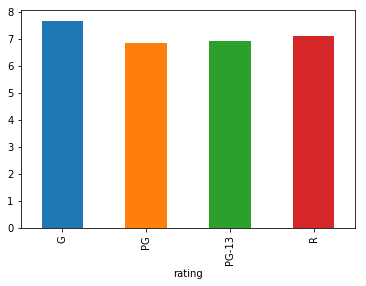

In [22]:
%matplotlib inline
movies1.groupby('rating').totalScore.mean().plot(kind='bar')

# Duration
Does the length of run time of a movie affect rating?

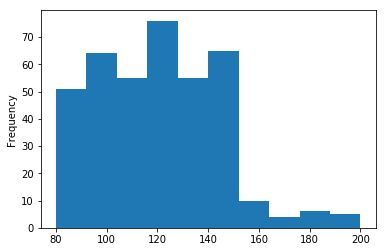

In [87]:
movies1.length.plot(kind='hist')

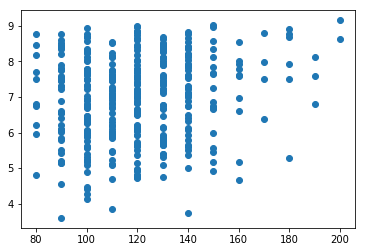

In [89]:
from matplotlib import pyplot as plt
plt.plot(movies1.length,movies1.totalScore,'o')


There is no clear correalation between duration and rating of a movie. The length of each movie is too dispersed. So i will round the length of each movie to nearest 10th number so i can categorize them further and see if i can find any meaningful insights. I create a function to do that here.

In [39]:
def custom_round(x, base):
    return int(base * round(float(x)/base))

movies1.length = movies1.length.apply(lambda x: custom_round(x, base=10))
movies1.length.head(10)


0    140
1    130
2    120
3    170
4    100
5    140
6    140
7    120
8    160
9    130
Name: length, dtype: int64

In [90]:
movies1.groupby('length').totalScore.count()

length
80     10
90     41
100    64
110    55
120    76
130    55
140    47
150    18
160    10
170     4
180     6
190     3
200     2
Name: totalScore, dtype: int64

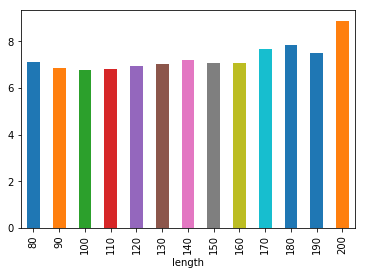

In [91]:
movies1.groupby('length').totalScore.mean().plot(kind='bar')

Movies that have a longer runtime were rated slightly better on average. But there is no clear indication whether duration of movie runtime correlates with the movie's rating. 

# Genre
Does genre affect movie rating? Are people more critical of certain genres as opposed to others? Some movies have multiple genres stored in a second and/or third feature. I will have to find a way to test each column and tally up the total. 

In [92]:
movies1.groupby('Genre_3').count()

,title,audience_freshness,rt_audience_score,rt_freshness,rt_score,Genre_1,Genre_2,imdb_rating,length,rating,totalScore
Genre_3,,,,,,,,,,,
Action,126,126,126,126,126,126,126,126,126,126,126
Adventure,60,60,60,60,60,60,60,60,60,60,60
Animation,12,12,12,12,12,12,12,12,12,12,12
Biography,4,4,4,4,4,4,4,4,4,4,4
Comedy,33,33,33,33,33,33,33,33,33,33,33
Crime,6,6,6,6,6,6,6,6,6,6,6
Drama,16,16,16,16,16,16,16,16,16,16,16
Family,1,1,1,1,1,1,1,1,1,1,1
Fantasy,1,1,1,1,1,1,1,1,1,1,1


In [93]:
movies1.groupby('Genre_1').mean()

,audience_freshness,rt_audience_score,rt_freshness,rt_score,imdb_rating,length,totalScore
Genre_1,,,,,,,
Action,77.333333,3.466667,82.666667,7.066667,7.366667,120.000000,7.473333
Adventure,76.769231,3.623077,81.307692,7.330769,7.438462,128.461538,7.564615
Animation,71.666667,3.650000,71.833333,6.633333,7.250000,95.000000,7.106667
Comedy,70.074074,3.425926,66.277778,6.370370,6.942593,99.444444,6.760000
Crime,67.058824,3.294118,67.470588,6.200000,6.782353,114.705882,6.604706
Drama,77.777778,3.529630,78.296296,7.003704,7.359259,121.851852,7.405926
Family,73.739130,3.504348,70.130435,6.417391,7.082609,107.391304,6.979130
Fantasy,70.500000,3.567308,66.673077,6.492308,7.026923,128.846154,6.874231
History,84.250000,3.800000,77.500000,7.350000,7.725000,155.000000,7.770000


In [101]:
genres = pd.concat([movies1['Genre_1'],movies1['Genre_2'],movies1['Genre_3']]).unique()
genres

array(['Sci-Fi', 'Family', 'Fantasy', 'Thriller', 'Comedy', 'Adventure',
       'Mystery', 'Animation', 'Crime', 'Romance', 'Drama', 'War',
       'History', 'Music', 'Action', 'Western', 'Horror', 'Sport',
       'Musical', nan, 'Biography'], dtype=object)

I create another dataframe (genreDF) that will keep track of the total number of movies for each genre, and the totalScore of each movie of that genre. 

In [102]:
genres = genres[~pd.isnull(genres)] # remove null values
genreDF = pd.DataFrame(genres,columns=['genre'])
genreDF['count']=0
genreDF['sum']=0
genreDF.sort_values('genre',inplace=True)
genreDF.head()

,genre,count,sum
14,Action,0,0
5,Adventure,0,0
7,Animation,0,0
19,Biography,0,0
4,Comedy,0,0


I create a function that adds the column of each Genre column one by one to genreDF

In [1]:
def countGenre(base,section):
    size = section.shape[0]
    size2 = base.shape[0]
    for x in range(size):
        for y in range(size2):
            if(section.iloc[x,2]==base.iloc[y,0]):
                base.iloc[y,1] += section.iloc[x,0]
                base.iloc[y,2] += section.iloc[x,1]
                break;
    return base

In [104]:
val1 = movies1.groupby('Genre_1').totalScore.agg(['count','sum'])
val1['index']=val1.index
genreDF = countGenre(genreDF,val1)
genreDF.head()

,genre,count,sum
14,Action,3,22.42
5,Adventure,13,98.34
7,Animation,6,42.64
19,Biography,0,0.00
4,Comedy,54,365.04


In [105]:
val2 = movies1.groupby('Genre_2').totalScore.agg(['count','sum'])
val2['index']=val2.index
genreDF = countGenre(genreDF,val2)
genreDF.head()

,genre,count,sum
14,Action,30,215.48
5,Adventure,114,783.40
7,Animation,34,252.10
19,Biography,0,0.00
4,Comedy,115,784.16


In [106]:
val3 = movies1.groupby('Genre_3').totalScore.agg(['count','sum'])
val3['index']=val3.index
genreDF = countGenre(genreDF,val3)
genreDF.head()

,genre,count,sum
14,Action,156,1057.60
5,Adventure,174,1208.98
7,Animation,46,342.36
19,Biography,4,32.04
4,Comedy,148,1003.02


In [107]:
genreDF['average']=(genreDF['sum']/genreDF['count']) 
genreDF.sort_values('average',ascending=False)

,genre,count,sum,average
19,Biography,4,32.04,8.010000
11,War,10,79.34,7.934000
12,History,7,54.42,7.774286
15,Western,7,52.92,7.560000
7,Animation,46,342.36,7.442609
10,Drama,107,767.44,7.172336
0,Sci-Fi,58,410.00,7.068966
17,Sport,7,49.24,7.034286
8,Crime,42,292.06,6.953810
5,Adventure,174,1208.98,6.948161


 Movies of Biography, War and History have the highest rating, while Musical, Horror and Comedy are rated most critically. In the second part, i will check to see for insights by joining two other available datasets.